In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Using lemonade.csv dataset and focusing on continuous variables:

In [2]:
df=pd.read_csv('https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv')

In [3]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [4]:
df.dtypes

Date            object
Day             object
Temperature    float64
Rainfall       float64
Flyers           int64
Price          float64
Sales            int64
dtype: object

In [5]:
day_mapping = {
    "Monday": 1,
    "Tuesday": 2,
    "Wednesday": 3,
    "Thursday": 4,
    "Friday": 5,
    "Saturday": 6,
    "Sunday": 7
}


df['Day'] = df['Day'].map(day_mapping)

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df['Day'] = df['Day'].astype(int)

In [8]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,2017-01-01,7,27.0,2.00,15,0.5,10
1,2017-01-02,1,28.9,1.33,15,0.5,13
2,2017-01-03,2,34.5,1.33,27,0.5,15
3,2017-01-04,3,44.1,1.05,28,0.5,17
4,2017-01-05,4,42.4,1.00,33,0.5,18


## Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?

In [9]:
def find_lower_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    return column[column < lower_bound]

lower_outliers = df.apply(find_lower_outliers)

In [10]:
lower_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,NaT,NaN,NaN,NaN,-38.0,NaN,NaN
364,NaT,NaN,15.1,NaN,NaN,NaN,NaN


## Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?

In [11]:
def find_upper_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    return column[column > upper_bound]

upper_outliers = df.apply(find_upper_outliers)

In [12]:
upper_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,NaT,NaN,NaN,2.00,NaN,NaN,NaN
1,NaT,NaN,NaN,1.33,NaN,NaN,NaN
2,NaT,NaN,NaN,1.33,NaN,NaN,NaN
5,NaT,NaN,NaN,1.54,NaN,NaN,NaN
6,NaT,NaN,NaN,1.54,NaN,NaN,NaN
10,NaT,NaN,NaN,1.54,NaN,NaN,NaN
11,NaT,NaN,NaN,1.33,NaN,NaN,NaN
12,NaT,NaN,NaN,1.33,NaN,NaN,NaN
15,NaT,NaN,NaN,1.67,NaN,NaN,NaN
16,NaT,NaN,NaN,1.43,NaN,NaN,NaN


#### Everything but Rainfall

## Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?

In [13]:
def find_lower_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 3 * IQR
    return column[column < lower_bound]

lower_outliers = df.apply(find_lower_outliers)

In [14]:
lower_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,NaT,NaN,NaN,NaN,-38,NaN,NaN


#### Yes, this outlier should be removed "Flyers: -38"

## Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [15]:
def find_upper_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 3 * IQR
    return column[column > upper_bound]

upper_outliers = df.apply(find_upper_outliers)

In [16]:
upper_outliers

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,NaT,NaN,NaN,2.00,NaN,NaN,NaN
41,NaT,NaN,212.0,NaN,NaN,NaN,NaN
181,NaT,NaN,NaN,NaN,NaN,NaN,143.0
182,NaT,NaN,NaN,NaN,NaN,NaN,158.0
183,NaT,NaN,NaN,NaN,NaN,NaN,235.0
184,NaT,NaN,NaN,NaN,NaN,NaN,534.0
338,NaT,NaN,NaN,1.82,NaN,NaN,NaN
343,NaT,NaN,NaN,1.82,NaN,NaN,NaN
364,NaT,NaN,NaN,2.50,NaN,NaN,NaN


#### Everything except Rainfall and Sales

## Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

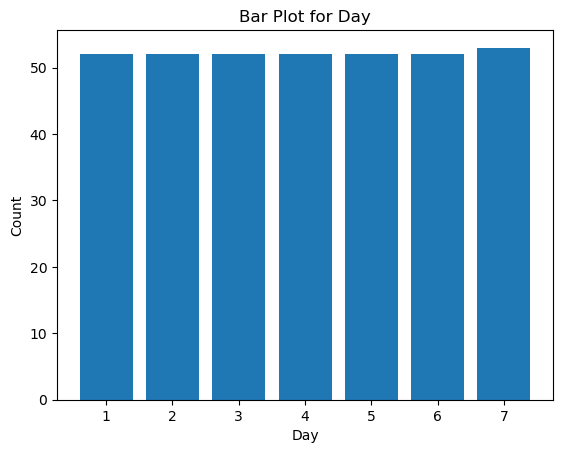

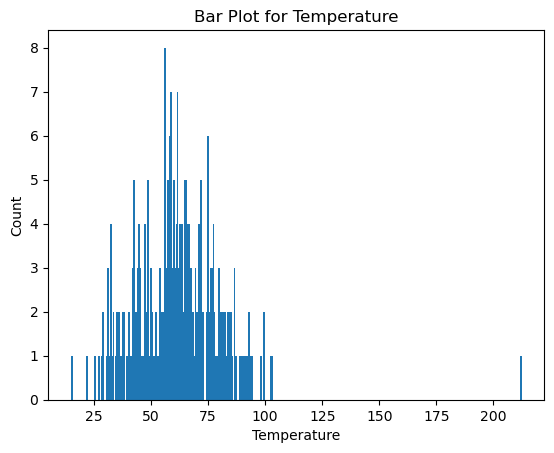

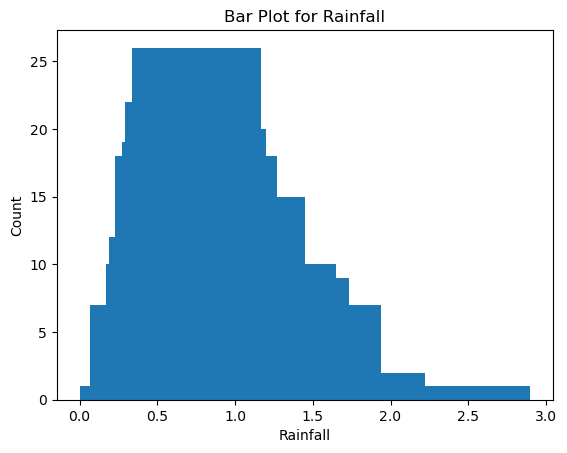

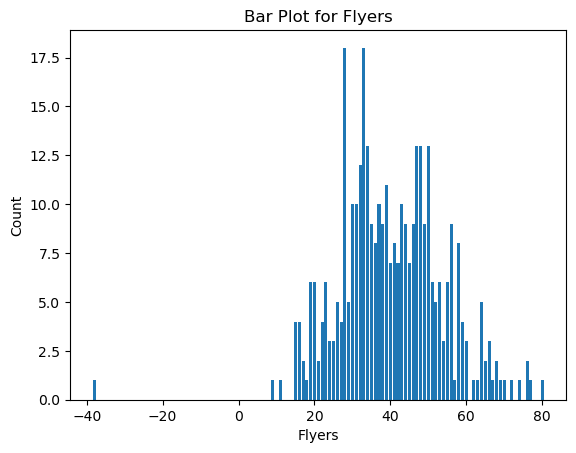

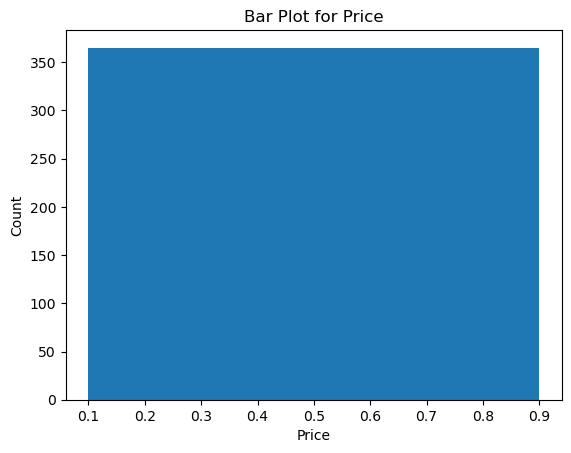

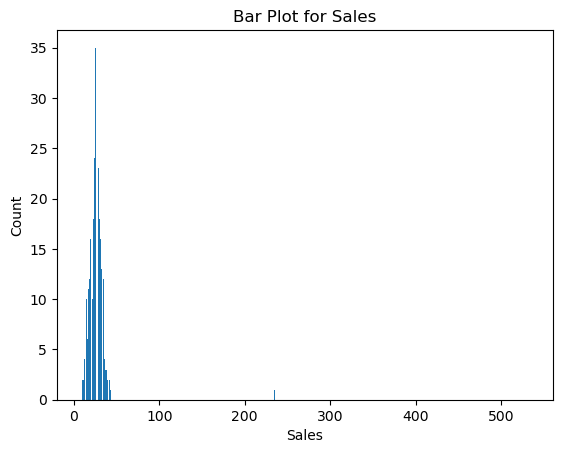

In [17]:
for column in df.columns:
    if df[column].dtype in [int, float]:
        plt.figure() 

       
        value_counts = df[column].value_counts()

       
        plt.bar(value_counts.index, value_counts)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Bar Plot for {column}')
        plt.show()

#### Temperature, Rainfall and Sales are all normally distributed.

## Use a 2 sigma decision rule to isolate the outliers.

In [18]:
def find_outliers_2sigma(column):
    mean = column.mean()
    std_dev = column.std()
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev
    return column[(column < lower_bound) | (column > upper_bound)]

In [19]:
for column in df.columns:
    if df[column].dtype in [int, float]: 
        outliers = find_outliers_2sigma(df[column])
        if not outliers.empty:
            print(f"Outliers in {column}:")
            print(outliers)

Outliers in Temperature:
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64
Outliers in Rainfall:
0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64
Outliers in Flyers:
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64
Outliers in Sales:
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64


## Do these make sense?

Yes

## Should certain outliers be kept or removed?

#### Eliminate outliers in Temperature, Rainfall and Flyers

## Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [20]:
def find_outliers_3sigma(column):
    mean = column.mean()
    std_dev = column.std()
    lower_bound = mean - 3 * std_dev
    upper_bound = mean + 3 * std_dev
    return column[(column < lower_bound) | (column > upper_bound)]

In [21]:
for column in df.columns:
    if df[column].dtype in [int, float]: 
        outliers = find_outliers_2sigma(df[column])
        if not outliers.empty:
            print(f"Outliers in {column}:")
            print(outliers)

Outliers in Temperature:
41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64
Outliers in Rainfall:
0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64
Outliers in Flyers:
166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64
Outliers in Sales:
181    143
182    158
183    235
184    534
Name: Sales, dtype: int64
